In [3]:
#과제- seed데이터로 split sequence사용 전후 cnn, dnn 학습 해보기 책 416p
# first neural network with keras tutorial
from numpy import loadtxt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import numpy as np

import pandas as pd

import seaborn as sns

In [5]:

column_names = ["area ", "perimeter ", "compactness ", "length of kernel", "width of kernel", "asymmetry coefficient", "length of kernel groove", "class"]          

df = pd.read_csv('seeds_dataset.txt', header=None, names=column_names, delimiter='\s+')

df.head(10)

,area,perimeter,compactness,length of kernel,width of kernel,asymmetry coefficient,length of kernel groove,class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
5,14.38,14.21,0.8951,5.386,3.312,2.462,4.956,1
6,14.69,14.49,0.8799,5.563,3.259,3.586,5.219,1
7,14.11,14.10,0.8911,5.420,3.302,2.700,5.000,1
8,16.63,15.46,0.8747,6.053,3.465,2.040,5.877,1
9,16.44,15.25,0.8880,5.884,3.505,1.969,5.533,1


In [6]:
df.isnull().sum()


area                       0
perimeter                  0
compactness                0
length of kernel           0
width of kernel            0
asymmetry coefficient      0
length of kernel groove    0
class                      0
dtype: int64

In [8]:
X = df.drop('class', axis=1).values
Y = df['class']
X

array([[15.26  , 14.84  ,  0.871 , ...,  3.312 ,  2.221 ,  5.22  ],
       [14.88  , 14.57  ,  0.8811, ...,  3.333 ,  1.018 ,  4.956 ],
       [14.29  , 14.09  ,  0.905 , ...,  3.337 ,  2.699 ,  4.825 ],
       ...,
       [13.2   , 13.66  ,  0.8883, ...,  3.232 ,  8.315 ,  5.056 ],
       [11.84  , 13.21  ,  0.8521, ...,  2.836 ,  3.598 ,  5.044 ],
       [12.3   , 13.34  ,  0.8684, ...,  2.974 ,  5.637 ,  5.063 ]])

In [9]:
def split_sequences(sequences, n_steps):
	X, y = list(), list()
	for i in range(len(sequences)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the dataset
		if end_ix > len(sequences):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1, -1]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=0.25,random_state=0)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(157, 7) (53, 7) (157,) (53,)


In [11]:
y_train_array = np.array(y_train)
train_set = np.c_[X_train, y_train_array]

y_test_array = np.array(y_test)
test_set = np.c_[X_test, y_test_array]

X_train, y_train = split_sequences(train_set, 3)
print(X_train.shape, y_train.shape)

X_test, y_test = split_sequences(test_set, 3)
print(X_test.shape, y_test.shape)   

(155, 3, 7) (155,)
(51, 3, 7) (51,)


In [12]:
y_train_onehot = pd.get_dummies(y_train).values
y_test_onehot = pd.get_dummies(y_test).values

print(y_train_onehot.shape, y_test_onehot.shape)

(155, 3) (51, 3)


In [13]:

import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam

from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import Input
from keras.layers import Dense, Flatten, Dropout

In [15]:

input_layer = Input(shape=(X_train.shape[1], X_train.shape[2]))

conv1 = Conv1D(filters=64, kernel_size=3, activation='relu')(input_layer) 
flat = Flatten()(conv1)
dens = Dense(64, activation = "relu")(flat)
outputs = Dense(3, activation = "sigmoid")(dens)

model = keras.Model(input_layer, outputs)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 3, 7)]            0         
                                                                 
 conv1d (Conv1D)             (None, 1, 64)             1408      
                                                                 
 flatten (Flatten)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 3)                 195       
                                                                 
Total params: 5763 (22.51 KB)
Trainable params: 5763 (22.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [16]:
history = model.fit(X_train, y_train_onehot, epochs=30, verbose=True,  validation_split = 0.1)

Epoch 1/30
5/5 [==============================] - 1s 29ms/step - loss: 0.7615 - accuracy: 0.3957 - val_loss: 0.6689 - val_accuracy: 0.4375
Epoch 2/30
5/5 [==============================] - 0s 5ms/step - loss: 0.6412 - accuracy: 0.5036 - val_loss: 0.6048 - val_accuracy: 0.4375
Epoch 3/30
5/5 [==============================] - 0s 5ms/step - loss: 0.5920 - accuracy: 0.5252 - val_loss: 0.5464 - val_accuracy: 0.5625
Epoch 4/30
5/5 [==============================] - 0s 6ms/step - loss: 0.5552 - accuracy: 0.5396 - val_loss: 0.5409 - val_accuracy: 0.5000
Epoch 5/30
5/5 [==============================] - 0s 6ms/step - loss: 0.5402 - accuracy: 0.5540 - val_loss: 0.5210 - val_accuracy: 0.7500
Epoch 6/30
5/5 [==============================] - 0s 6ms/step - loss: 0.5210 - accuracy: 0.7770 - val_loss: 0.5110 - val_accuracy: 0.5000
Epoch 7/30
5/5 [==============================] - 0s 6ms/step - loss: 0.5098 - accuracy: 0.6187 - val_loss: 0.5240 - val_accuracy: 0.5625
Epoch 8/30
5/5 [=================

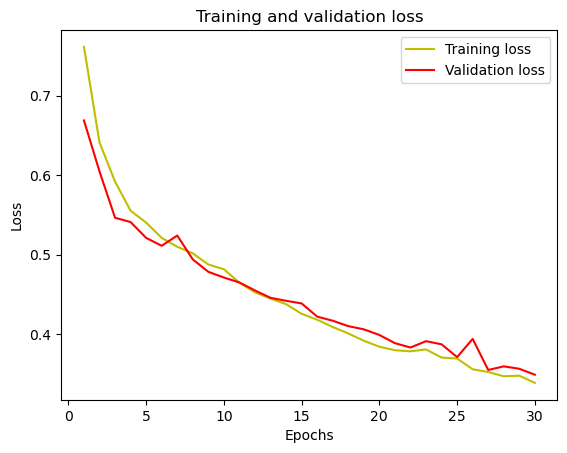

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()